# **Time series forecasting**

In [1]:
# getting time series related data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-10-29 04:49:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2024-10-29 04:49:08 (4.17 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# importing time series data by using pandas
import pandas as pd
# let's read the bitcoin data and parse the dates
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=['Date'],
               index_col=['Date'])


In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
 len(df)

2787

In [7]:
bitcoin_price=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [8]:
bitcoin_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [9]:
# getting bitcoin dates into an array
timestep=bitcoin_price.index.to_numpy()
prices=bitcoin_price['Price'].to_numpy()
timestep[:5],prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [10]:
# wrong way to make train and test sets for our time series data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(timestep,
                                               prices,
                                               test_size=0.2,
                                               random_state=42)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

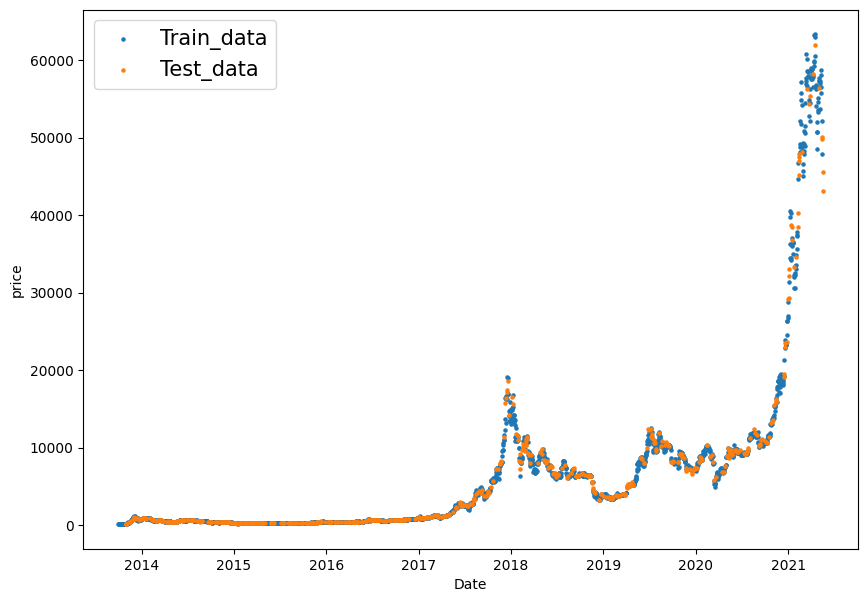

In [12]:
# let us plot the wrong train and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train_data")
plt.scatter(x_test,y_test,s=5,label="Test_data")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend(fontsize=15)
plt.show()

# Right way : to make train and test set in our time series data

In [13]:
 # first we make train data split
 split_size=int(0.8*len(prices))

# create train data split
x_train,y_train=timestep[:split_size],prices[:split_size]

# create test data split
x_test,y_test=timestep[split_size:],prices[split_size:]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

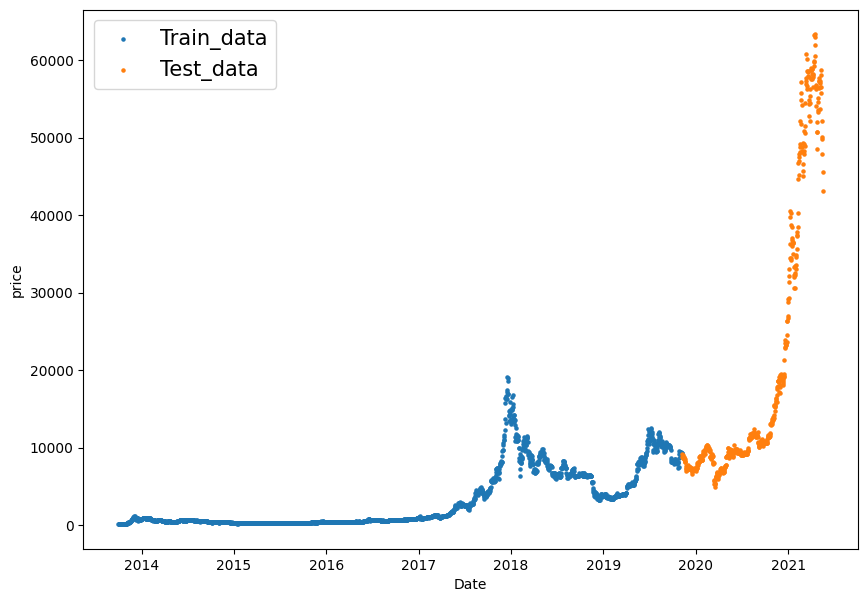

In [14]:
# let us plot the right train and test sets
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train_data")
plt.scatter(x_test,y_test,s=5,label="Test_data")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend(fontsize=15)
plt.show()

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


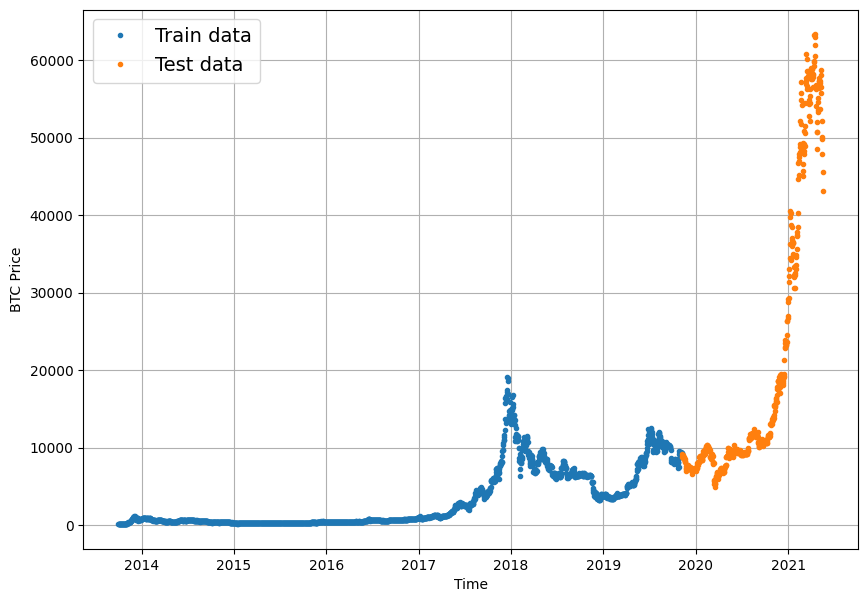

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")


# **MODELLING EXPERIMENT**



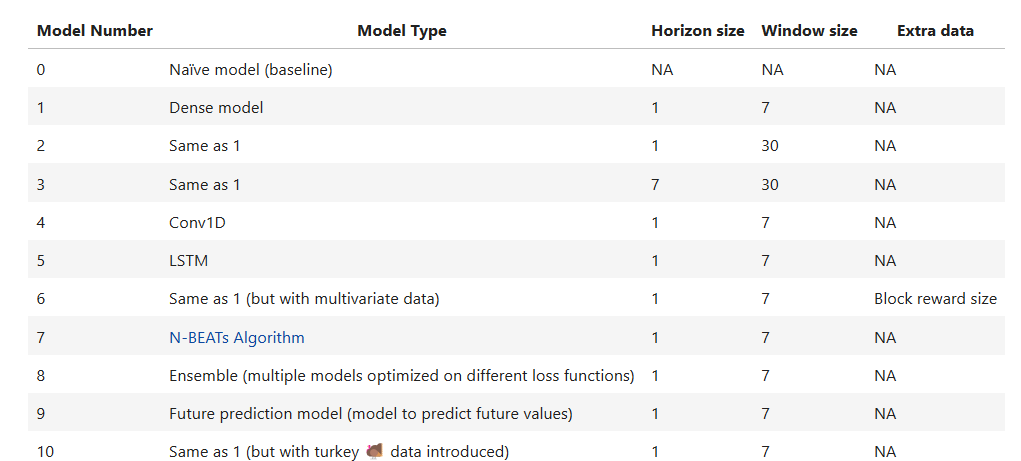


In [17]:
# MODEL 0 : Naive Model
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [18]:
# create Naive forecast
naive_forecast=y_test[:-1]

In [19]:
naive_forecast[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

# **MAIN MODELLING** starts from here:

In [20]:
# implementation of evaluation metrices
# 1. MASE- Mean Absolute scaled error

In [21]:
import tensorflow as tf

### **CREATE** A **FUNCTION** TO TAKE THE **MODEL PREDICTIONS** AND **TRUTH VALUES AND RETURN EVALUATION METRICES VALUES**:

In [22]:
import tensorflow as tf

# Custom mean_absolute_scaled_error (assuming it's defined elsewhere)
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    naive_mae = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # Assuming this is your naive forecast benchmark
    return mae / naive_mae

def evaluate_preds(y_true, y_pred):
    # Ensure y_true and y_pred are float32 for metric calculations
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)

    # Instantiate MeanAbsolutePercentageError class
    mape_fn = tf.keras.losses.MeanAbsolutePercentageError()
    mape = mape_fn(y_true, y_pred)

    # Calculate MASE using a custom function
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }




In [23]:
# Working with the naive forecast
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

In [24]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [25]:
import numpy as np
list=np.array([[1,2,3,4,5,6,7]])
print(list[:,:-1])
print(list[:,-1:])

[[1 2 3 4 5 6]]
[[7]]


In [26]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [27]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [28]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [29]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [30]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

## Turning windows into training and test sets


In [31]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint


In [33]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Dense model (window = 7, horizon = 1)

In [34]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(1, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name + ".keras")]) # create ModelCheckpoint callback to save best model


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1714.8143 - mae: 1714.8143 - val_loss: 2869.3044 - val_mae: 2869.3044
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 355.6443 - mae: 355.6443 - val_loss: 1227.8905 - val_mae: 1227.8905
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 228.8723 - mae: 228.8723 - val_loss: 1203.5914 - val_mae: 1203.5914
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 207.8983 - mae: 207.8983 - val_loss: 1146.1488 - val_mae: 1146.1488
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 196.8400 - mae: 196.8400 - val_loss: 1142.8912 - val_mae: 1142.8912
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 189.5487 - mae: 189.5487 - val_loss: 1070.1266 - val_mae: 1070.1266
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 180.9351 - mae: 180.9351 - val_loss: 1042.9683 - val_mae: 1042.9683
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 173.1275 - mae: 173.1275 - val_loss: 995.772

In [35]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 284.0867 - mae: 284.0867 


[566.522705078125, 566.522705078125]

In [36]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 282.5745 - mae: 282.5745  


[564.189697265625, 564.189697265625]

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [38]:
model_1_preds=make_preds(model_1,test_windows)
model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8864.041, 8816.914, 9066.773, 8807.918, 8780.693, 8731.033,
       8716.207, 8543.888, 8480.594, 8554.799], dtype=float32)>

In [39]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [40]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)

In [41]:
model_1_results

{'mae': 564.1897,
 'mse': 1162569.1,
 'rmse': 1078.225,
 'mape': 2.5276127,
 'mase': 0.99112505}

In [42]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Model 2: Dense (window = 30, horizon = 1)

In [43]:
full_windows,full_labels=make_windows(prices, window_size=30, horizon=1)
len(full_windows),len(full_labels)

(2757, 2757)

In [44]:
# Making train and test split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [45]:
train_windows.shape,train_labels.shape,test_windows.shape,test_labels.shape

((2205, 30), (2205, 1), (552, 30), (552, 1))

In [46]:
# making another dense model 2
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(1) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name + ".keras")])

In [47]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 338.7640 


645.5774536132812

In [48]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 305.0353 


599.5131225585938

In [49]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [50]:
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8896.007 , 8933.653 , 8849.338 , 8656.14  , 8335.464 , 8353.29  ,
       8281.358 , 8165.294 , 8181.9478, 7662.129 ], dtype=float32)>

In [51]:
test_labels[:10]

array([[8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599],
       [8118.4885358 ],
       [8074.84317361],
       [7612.7405735 ],
       [7262.11053495]])

In [52]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)

In [53]:
model_2_results

{'mae': 599.5131,
 'mse': 1255760.2,
 'rmse': 1120.607,
 'mape': 2.7053692,
 'mase': 1.0479547}

In [54]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [55]:
# model_2 performs slightly better than model 1 and naive (baseline) model

## Model 3: Dense (window = 30, horizon = 7)


In [56]:
full_windows,full_labels=make_windows(prices, window_size=30, horizon=7)
len(full_windows),len(full_labels)

(2751, 2751)

In [57]:
# Making train and test split
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(7)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name + ".keras")])

In [59]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 621.9067 


1242.81103515625

In [60]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 618.3354 


1240.721923828125

In [61]:

# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9509.2295, 9371.996 , 9200.803 , 9433.593 , 9368.416 , 9351.358 ,
        9348.966 ],
       [9354.477 , 9259.554 , 9125.089 , 9205.818 , 9249.117 , 9234.101 ,
        9159.399 ],
       [9089.67  , 9040.346 , 9088.932 , 8974.858 , 8999.562 , 9222.21  ,
        9118.446 ],
       [8978.701 , 9011.65  , 9211.048 , 9036.38  , 9139.929 , 9187.466 ,
        9045.0625],
       [8779.011 , 8939.837 , 9073.312 , 8751.497 , 8987.706 , 8750.133 ,
        8713.768 ]], dtype=float32)>

In [62]:

# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1240.722,
 'mse': 5351997.5,
 'rmse': 2313.4385,
 'mape': 5.504885,
 'mase': 2.2077951}

## Model 4: Conv1D


In [63]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [64]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [65]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [66]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [67]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [68]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name + ".keras")]
            )

In [69]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [70]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1D.keras",safe_mode=False)


ValueError: Sequential model 'model_4_conv1D' has already been configured to use input shape (None, 7). You cannot build it with input_shape [None, 7]

In [71]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 285.4877 


570.0322875976562

In [72]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8904.012, 8792.136, 9013.828, 8814.52 , 8745.593, 8747.735,
       8696.574, 8545.105, 8471.614, 8529.126], dtype=float32)>

In [73]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.0323,
 'mse': 1186943.5,
 'rmse': 1089.4694,
 'mape': 2.5512433,
 'mase': 1.0013888}

In [74]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Model 5: RNN (LSTM)


In [75]:

HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [76]:
from tensorflow.keras.layers import Lambda
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name + ".keras")])

In [77]:
# Load in best version of model 5 and evaluate on the test data
import keras
keras.config.enable_unsafe_deserialization()
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=input_layer_4>',)
  • kwargs={'mask': 'None'}

In [79]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 298.4146 


595.2001342773438

In [80]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8873.209, 8759.775, 8929.094, 8719.449, 8693.9  , 8702.662,
       8625.671, 8501.296, 8419.107, 8465.648], dtype=float32)>

In [81]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 595.20013,
 'mse': 1239333.5,
 'rmse': 1113.2535,
 'mape': 2.6901062,
 'mase': 1.0456017}

In [82]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}


##Model 7: N-BEATS algorithm


##Building and testing an N-BEATS block layer

In [96]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [97]:
# lets make the first dummy NBeatsBlock to represent the input and output
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


In [98]:
# lets create first dummy inputs and outputs for our NBeatBlock
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [101]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.07638257 -1.2425439   0.8094845  -0.00674714  0.3773714  -0.84497803
  0.06121247]
Forecast: 0.41187119483947754


## preparing data for N-Beats algo using 'tf.data'

In [103]:
WINDOW_SIZE=7
HORIZON=1

In [105]:
# create NBeat data inputs
bitcoin_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [110]:
# add windowed column in bitcoin_prices
bitcoin_price_nbeat=bitcoin_price.copy()
for i in range(WINDOW_SIZE):
  bitcoin_price_nbeat[f"Price+{i+1}"]=bitcoin_price_nbeat["Price"].shift(periods=i+1)
bitcoin_price_nbeat.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [121]:
# make features and labels
x=bitcoin_price_nbeat.dropna().drop("Price",axis=1)
y=bitcoin_price_nbeat.dropna()["Price"]

# make train and test sets
split_size=int(len(x)*0.8)

x_train,y_train=x[:split_size],y[:split_size]
x_test,y_test=x[split_size:],y[split_size:]
print(f"x_train:{len(x_train)}")
print(f"x_test:{len(x_test)}")
print(f"y_train:{len(y_train)}")
print(f"y_test:{len(y_test)}")

x_train:2224
x_test:556
y_train:2224
y_test:556


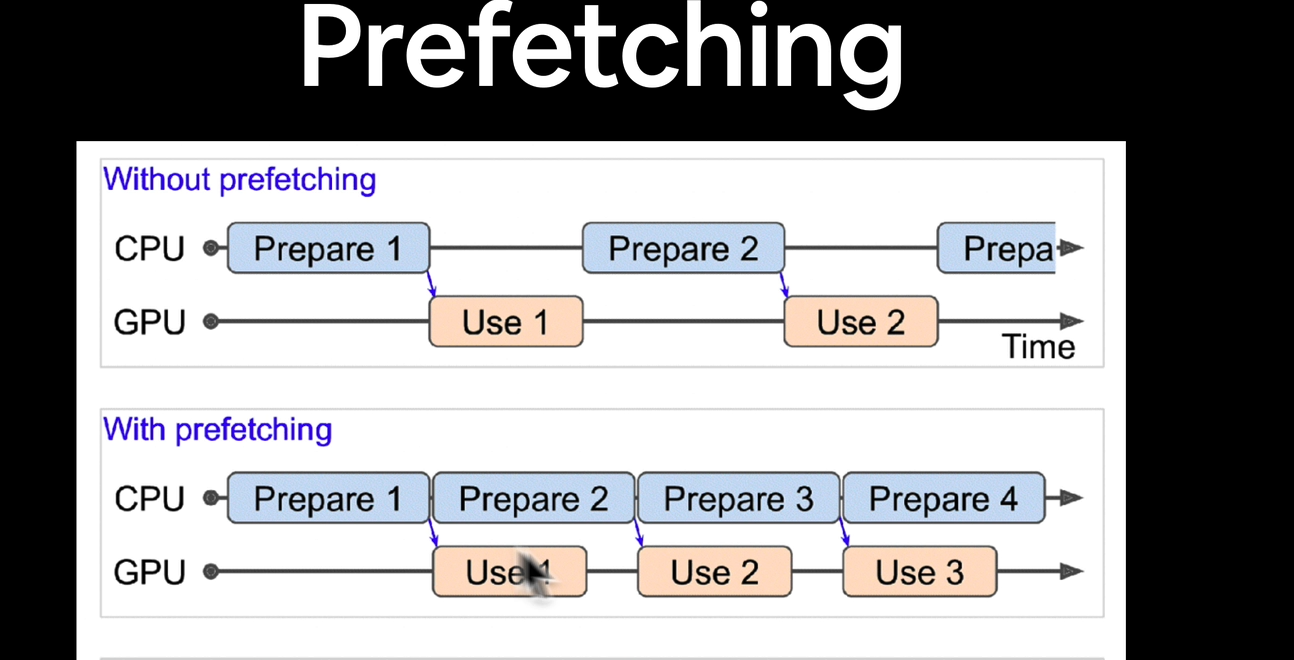

In [126]:
# 1. time to make our dataset performant using tf.data API
train_features_dataset=  tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset=  tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=  tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset=  tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# 3. Preparing Batch and Prefetching
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

##Setting up hyperparameters for N-BEATS algorithm


In [127]:
 # Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connection

#### before craft our NBeat model, we need two layer for residual connection


In [132]:
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)

print(f"tensor 1:{tensor_1.numpy()}")
print(f"tensor 1:{tensor_2.numpy()}")

# subtract
subtracted=layers.subtract([tensor_1,tensor_2])

# added
added=layers.add([tensor_1,tensor_2])

# output
print(f"layers after subtraction:{subtracted.numpy()}")
print(f"layers after adding:{added.numpy()}")

tensor 1:[10 11 12 13 14 15 16 17 18 19]
tensor 1:[0 1 2 3 4 5 6 7 8 9]
layers after subtraction:[10 10 10 10 10 10 10 10 10 10]
layers after adding:[10 12 14 16 18 20 22 24 26 28]


###💀⚡: NBeats algo uses double residual stacking approach to help train its deeper architecture

In [149]:
# NOW READY TO BUILDING, COMPILING, EVALUATING AND FITTING OUR NBeat Block
%time

tf.random.set_seed(42)

# 1. setup and instance NBeatBlock
nbeat_block_layer=NBeatsBlock( input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="initial_block")
# 2.creating input to stack
stack_input= layers.Input(shape=(INPUT_SIZE,),name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast=nbeat_block_layer(stack_input)

# Add in subtraction residual link
residual=layers.subtract([stack_input,backcast])

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

# 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residual) # pass it in residuals (the backcast)

# 6. Create the double residual stacking
residual = layers.subtract([residual, backcast], name=f"subtract_{i}")
forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs

Epoch 206: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 306: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [150]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 561.3484 - mae: 561.3484 - mse: 1144670.8750


[561.3484497070312, 561.3484497070312, 1144670.875]

In [151]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8823.645, 8764.666, 8991.501, 8748.095, 8726.634, 8687.381,
       8662.075, 8497.117, 8434.069, 8494.243], dtype=float32)>

In [152]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 561.34845,
 'mse': 1144670.9,
 'rmse': 1069.893,
 'mape': 2.5650556,
 'mase': 0.98613375}

In [153]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}